# Auto Insurance #

The aim of this file is to predict the *TARGET_FLAG* variable based on auto insurance datasets given beforehand.

In [1]:
## Let's import the necessary libraries first

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.set_option('display.max_columns', None) # To view all columns at once when looking at a dataframe

In [2]:
## Importing the data

import os

path = os.getcwd() # to get the current working directory

train_auto = pd.read_csv(path + '\\Data\\train_auto.csv') # train data 
test_auto = pd.read_csv(path + '\\Data\\test_auto.csv') # test data (without the values for the target variables)

# It seems that the files SHELL_AUTO and MEAN_AUTO are not useful as they represent examples 
# of the output files we need to generate

### First look at the data

In [3]:
print(train_auto.shape)
print(test_auto.shape)

# We have a train/test split of about 80/20

train_auto.head(10)

(8161, 26)
(2141, 26)


,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
5,7,1,2946.0,0,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban
6,8,0,0.0,0,54.0,0,NaN,"$18,755",No,NaN,Yes,z_F,<High School,z_Blue Collar,33,Private,"$8,780",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
7,11,1,4021.0,1,37.0,2,NaN,"$107,961",No,"$333,680",Yes,M,Bachelors,z_Blue Collar,44,Commercial,"$16,970",1,Van,yes,"$2,374",1,Yes,10,7.0,Highly Urban/ Urban
8,12,1,2501.0,0,34.0,0,10.0,"$62,978",No,$0,z_No,z_F,Bachelors,Clerical,34,Private,"$11,200",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
9,13,0,0.0,0,50.0,0,7.0,"$106,952",No,$0,z_No,M,Bachelors,Professional,48,Commercial,"$18,510",7,Van,no,$0,0,No,1,17.0,z_Highly Rural/ Rural


We have 26 columns, with 23 variables that may be useful for our prediction (categorical and numerical variables).

The other columns are **INDEX** (which concatenated with the *test_auto* gives us the total dataset of 10,302 lines), **TARGET_FLAG** (whose values are 0 or 1) and **TARGET_AMT** which goes along with **TARGET_FLAG** and has non zero values if the latter has a 1 in the same line.

However as it is asked of us, we will only look at the response variable **TARGET_FLAG**, so we are tackling a classification problem.

Let's look at the different columns.

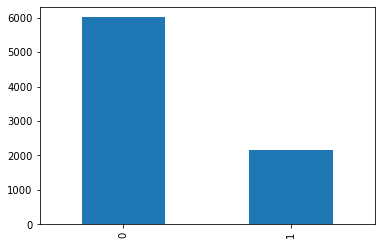

In [4]:
y = train_auto['TARGET_FLAG']
_ = y.value_counts().plot(kind="bar")

So we have approximately 3 times as many zeros as ones for the target variable (at least in the train dataset)

In [5]:
# Let's view our column types

train_auto.dtypes

INDEX            int64
TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME          object
PARENT1         object
HOME_VAL        object
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK        object
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM        object
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

As we can see we have both numerical and categorical variables, but some column types whose dtypes are object can be changed to numerical : **INCOME**, **HOME_VAL**, **BLUEBOOK** and **OLDCLAIM** whose values are all in dollars. We will hence change their types to floats before predicting.

In [6]:
## Transforming the values in dollars to floats

def transform_value_to_num(string):
    '''Transforming values with dollar in front to numerical type'''
    if isinstance(string, str):
        new = string.replace('$', '').replace(',', '') # delete the dollar and commas in the string
        return(float(new)) # transform to float

# Apply the function to the necessary columns
for name in ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']:
    train_auto[name] = train_auto[name].apply(lambda x: transform_value_to_num(x))

Now we have our categorical and numerical variables as we want them to be.

### Seperating Numerical and Categorical

In [7]:
train_auto.dtypes

INDEX            int64
TARGET_FLAG      int64
TARGET_AMT     float64
KIDSDRIV         int64
AGE            float64
HOMEKIDS         int64
YOJ            float64
INCOME         float64
PARENT1         object
HOME_VAL       float64
MSTATUS         object
SEX             object
EDUCATION       object
JOB             object
TRAVTIME         int64
CAR_USE         object
BLUEBOOK       float64
TIF              int64
CAR_TYPE        object
RED_CAR         object
OLDCLAIM       float64
CLM_FREQ         int64
REVOKED         object
MVR_PTS          int64
CAR_AGE        float64
URBANICITY      object
dtype: object

In [8]:
# Get all the names of the numerical columns

col_names = train_auto.columns.to_list()

def is_num(df):
    '''Function returning a list of column names that have numerical type'''
    num_cols = []
    x = df.dtypes
    for i in range(len(df.columns)):
        if x[i] == 'int64' or x[i] == 'float64':
            num_cols.append(df.columns[i])
    return num_cols

num_col = is_num(train_auto) # All numerical columns (including 'INDEX', and the two target variables)

num_cols = num_col[3:] # We take the columns starting from the 4th because the others are not explanatory variables
cat_cols = [s for s in col_names if s not in num_col]

# We now have the list of our categorical and numerical columns
len(num_cols) + len(cat_cols) + 3 == 26 #To make sure we haven't missed a column

True

It is difficult to know exactly what all columns represent, TIF for instance, hence we decide that the numerical columns are all the ones with numerical values. 

### Exploratory Analysis

Here we will quickly look at certain variables, but lacking time we will not make it truly thorough.

Given the nature of the data, we can surmise that the variables with **CAR** will have a large impact on our target variable (as we are looking at auto insurance).

In [9]:
train_auto['CAR_USE'].unique()

array(['Private', 'Commercial'], dtype=object)

In [10]:
private = train_auto[train_auto['CAR_USE'] == 'Private']
comm = train_auto[train_auto['CAR_USE'] == 'Commercial']

private_val = private['TARGET_FLAG'].value_counts()
comm_val = comm['TARGET_FLAG'].value_counts()

print('Percentage of TARGET_FLAG=1 for a private use : ', round(100*private_val[1]/(private_val[0] + private_val[1]), 2), '%')
print('Percentage of TARGET_FLAG=1 for a commercial use : ', round(100*comm_val[1]/(comm_val[0] + comm_val[1]), 2), '%')

Percentage of TARGET_FLAG=1 for a private use :  21.55 %
Percentage of TARGET_FLAG=1 for a commercial use :  34.57 %


Hence, people who use their car for 'Commercial' purposes are more likely to get a **TARGET_FLAG**=1, which could have been expected.

We can also look at **CAR_AGE**, which could show us some interesting things.

In [11]:
print('Average car age for TARGET_FLAG=1 : ', train_auto[train_auto['TARGET_FLAG']==1]['CAR_AGE'].mean())
print('Average car age for TARGET_FLAG=0 : ', train_auto[train_auto['TARGET_FLAG']==0]['CAR_AGE'].mean())

Average car age for TARGET_FLAG=1 :  7.367478866235704
Average car age for TARGET_FLAG=0 :  8.670921985815603


In [12]:
new = train_auto.groupby(['TARGET_FLAG', 'CAR_AGE'], as_index=False)['TARGET_AMT'].count()
new.columns = ['TARGET_FLAG', 'CAR_AGE', 'COUNT']
new.head()

,TARGET_FLAG,CAR_AGE,COUNT
0,0,0.0,3
1,0,1.0,1308
2,0,2.0,8
3,0,3.0,38
4,0,4.0,101


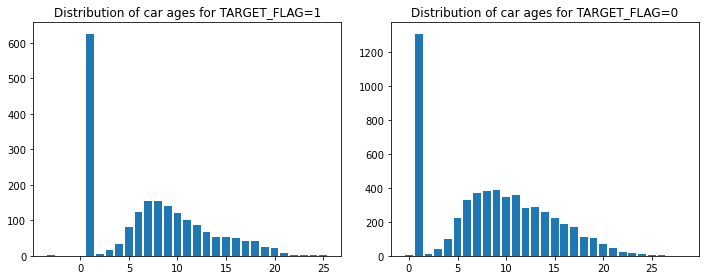

In [13]:
target_one = new[new['TARGET_FLAG']==1][['CAR_AGE', 'COUNT']]
target_zero = new[new['TARGET_FLAG']==0][['CAR_AGE', 'COUNT']]


plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title('Distribution of car ages for TARGET_FLAG=1')
plt.bar(target_one['CAR_AGE'],target_one['COUNT'])

plt.subplot(1, 2, 2)
plt.title('Distribution of car ages for TARGET_FLAG=0')
plt.bar(target_zero['CAR_AGE'],target_zero['COUNT'])


plt.tight_layout()
plt.show()

There doesn't seem to be much to be made of the **CAR_AGE** variable with these plots, as they look alike, except that the one with **TARGET_FLAG**==0 has double the value counts.

Also, we notice that we are missing values, but it is due to the large amount of empty cells for the variable **CAR_AGE**.

Let's do the same thing for the variable **INCOME**:

In [14]:
## We first look at the distribution of INCOME in our dataset

train_auto[['INCOME']].describe()

,INCOME
count,7716.000000
mean,61898.094609
std,47572.682808
min,0.000000
25%,28097.000000
50%,54028.000000
75%,85986.000000
max,367030.000000


As expected the mean is above the median, let's bin the values into what seems like appropriate intervals:

In [15]:
bins = np.linspace(0, 120000, 13)
bins = np.insert(bins, 13, [150000, 200000, 300000, 400000])
print('We have binned into groups delimited by these values : ', bins)

one = train_auto[train_auto['TARGET_FLAG']==1]
one_inc = one.groupby(pd.cut(one['INCOME'], bins), as_index=False)['TARGET_FLAG'].count()
one_inc['INCOME_BIN'] = np.arange(0,16)
one_inc.columns = ['COUNT', 'INCOME_BIN']


zero = train_auto[train_auto['TARGET_FLAG']==0]
zero_inc = zero.groupby(pd.cut(zero['INCOME'], bins), as_index=False)['TARGET_FLAG'].count()
zero_inc['INCOME_BIN'] = np.arange(0,16)
zero_inc.columns = ['COUNT', 'INCOME_BIN']

We have binned into groups delimited by these values :  [     0.  10000.  20000.  30000.  40000.  50000.  60000.  70000.  80000.
  90000. 100000. 110000. 120000. 150000. 200000. 300000. 400000.]


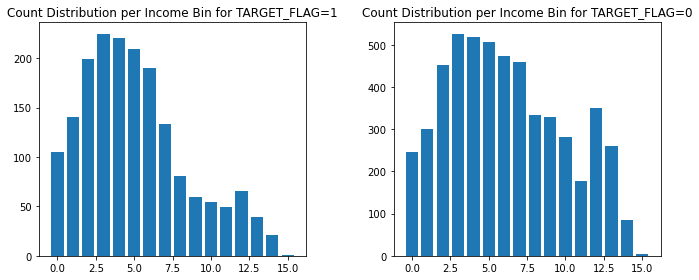

,INCOME_BIN,ONE_perc
0,0,29.829545
1,1,31.972789
2,2,30.568356
3,3,29.920213
4,4,29.769959
5,5,29.230769
6,6,28.657617
7,7,22.428331
8,8,19.518072
9,9,15.384615


In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.title('Count Distribution per Income Bin for TARGET_FLAG=1')
plt.bar(one_inc['INCOME_BIN'], one_inc['COUNT'])

plt.subplot(1, 2, 2)
plt.title('Count Distribution per Income Bin for TARGET_FLAG=0')
plt.bar(zero_inc['INCOME_BIN'], zero_inc['COUNT'])

plt.tight_layout()
plt.show()


merged = pd.merge(one_inc, zero_inc, on='INCOME_BIN')
merged['ONE_perc'] = 100*merged['COUNT_x']/(merged['COUNT_y']+merged['COUNT_x'])
merged[['INCOME_BIN', 'ONE_perc']]

The plots are once again similar, although here we can see that the higher the income, the likelier the individual will not have a **TARGET_FLAG** = 1. We have around 30% of **TARGET_FLAG**=1, in lower incomes (<$70k), and around 20% for the higher incomes.

We could look at some other variables in particular, or delve deeper into the analyses of the variables we have just illustrated, but let us move on to predicting.

### Prediction

We will now create a Pipeline to transform our dataframe in the best way possible before fitting a classifier to it that will then predict on our test data.

In [17]:
# Importing the modules

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier

In [18]:
### Categorical Data

train_auto_cat = train_auto[cat_cols]
train_auto_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PARENT1     8161 non-null   object
 1   MSTATUS     8161 non-null   object
 2   SEX         8161 non-null   object
 3   EDUCATION   8161 non-null   object
 4   JOB         7635 non-null   object
 5   CAR_USE     8161 non-null   object
 6   CAR_TYPE    8161 non-null   object
 7   RED_CAR     8161 non-null   object
 8   REVOKED     8161 non-null   object
 9   URBANICITY  8161 non-null   object
dtypes: object(10)
memory usage: 637.7+ KB


We can see we only have nulls for the category **JOB**, we have to treat these empty values before fitting our model.
Since these are categorical values, we must replace the missing ones by the made-up category 'missing'.

We also must encode these categorical variables, it can be done through several different ways, but we will using an Ordinal Encoder, hence the categorical pipeline:

In [19]:
#Categorical pipeline
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OrdinalEncoder(),
)

In [20]:
### Numerical Data

train_auto_num = train_auto[num_cols]
train_auto_num.info() # Same as for categorical data, we need to treat the empty values before proceeding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   KIDSDRIV  8161 non-null   int64  
 1   AGE       8155 non-null   float64
 2   HOMEKIDS  8161 non-null   int64  
 3   YOJ       7707 non-null   float64
 4   INCOME    7716 non-null   float64
 5   HOME_VAL  7697 non-null   float64
 6   TRAVTIME  8161 non-null   int64  
 7   BLUEBOOK  8161 non-null   float64
 8   TIF       8161 non-null   int64  
 9   OLDCLAIM  8161 non-null   float64
 10  CLM_FREQ  8161 non-null   int64  
 11  MVR_PTS   8161 non-null   int64  
 12  CAR_AGE   7651 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 829.0 KB


For the numerical data, we will replace missing values with the most frequent value in the column, and we will use the StandardScaler to scale the numerical values.

In [21]:
#Numerical pipeline
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

Finally we combine the preprocessing steps to make our pipeline

In [22]:
#Combine the numerical and categorical pipelines

preprocessing = make_column_transformer(
    (num_pipeline, num_cols),
    (cat_pipeline, cat_cols)
)

# We will use a simple XGBClassifier for the project, with default parameters

model = make_pipeline(
    preprocessing,
    XGBClassifier()
)

Let's Test

In [23]:
cols = num_cols + cat_cols # combine all the explanatory variable names into one list

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_auto[cols], train_auto['TARGET_FLAG'], random_state=42
)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

print(1-(y_test.sum()/len(y_test)))

0.7790298873101421
0.7251347378735914


As a first look it is not too bad, but not that great considering that by predicting 0s for every line of X_test, would get us an accuracy of 72.5% !

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

confusion_matrix(y_test, model.predict(X_test))
# We have a lot of errors, as we have around 150 False 1s around 300 False 0s, which is huge 
# (more than the correctly predicted 1s)

array([[1340,  140],
       [ 311,  250]], dtype=int64)

As our accuracy is not that great and we can't seem to predict the 1s very well, let's try using the imbalanced learning package, and randomly under sampling our data to get approximately the same number of 0s and 1s.

In [25]:
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from imblearn.under_sampling import RandomUnderSampler

model_undersampled = make_pipeline_imblearn(
    preprocessing,
    RandomUnderSampler(),
    XGBClassifier()
)

In [26]:
model_undersampled.fit(X_train, y_train)
print('Accuracy : ', model.score(X_test, y_test))
print('Balanced Accuracy for Original Model : ', balanced_accuracy_score(y_test, model.predict(X_test)))
print('Balanced Accuracy for Undersampled Model : ', balanced_accuracy_score(y_test, model_undersampled.predict(X_test)))
# We use balanced accuracy score to see what we can actually learn from the data set,
# it is computed by weighing the values according to their prevalence in the dataset

confusion_matrix(y_test, model_undersampled.predict(X_test))

Accuracy :  0.7790298873101421
Balanced Accuracy for Original Model :  0.6755191019896902
Balanced Accuracy for Undersampled Model :  0.7152033049091873


array([[1038,  442],
       [ 152,  409]], dtype=int64)

We get better results for the imbalanced model ! However it is at the expense of getting more false 1s for the **TARGET_FLAG** variable.

Finally, let's perform a 10-fold cross validation to make sure our model is robust.

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(model_undersampled, train_auto[cols], train_auto['TARGET_FLAG'], cv=cv, n_jobs=-1)
print(scores)
print(np.mean(scores))

[0.70746634 0.72303922 0.68872549 0.67647059 0.72794118 0.72303922
 0.73529412 0.69485294 0.69117647 0.73529412]
0.7103299673602611


The scores obtained by cross validating are all rather similar, around 70% score, hence we can say our model is rather robust.

In [28]:
# Let's look at the fscore, for a positive TARGET_FLAG=1, which is an interesting metric for classification.

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, model_undersampled.predict(X_test), pos_label=1)
recall = recall_score(y_test, model_undersampled.predict(X_test), pos_label=1)
print(f"Precision : {precision}")
print(f"Recall : {recall}")

Precision : 0.4806110458284371
Recall : 0.7290552584670231


We have a good recall but not a very good precision, but this was our choice, as we would rather have more accurately predicted 1s for **TARGET_FLAG**.

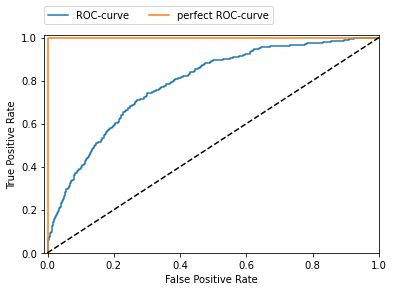

In [29]:
# We can finally look a the ROC curve for our model, to illustrate.

from sklearn.metrics import roc_curve

p_test = model_undersampled.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, model_undersampled.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='ROC-curve')
plt.plot([0, 0, 1], [0, 1, 1], label='perfect ROC-curve')
plt.plot(range(0, 2), 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.01)
plt.legend(ncol=2, bbox_to_anchor=(0, 1.05, 1., .3),
           loc=3, borderaxespad=0)

We can clearly see there is room for improvement!

In [30]:
# Finally, let's take a look at feature importances

importance = pd.DataFrame({'feature' : cols ,'importance' : model.named_steps['xgbclassifier'].feature_importances_})
importance.sort_values(by='importance',ascending =False)

,feature,importance
22,URBANICITY,0.166209
13,PARENT1,0.084205
21,REVOKED,0.074467
18,CAR_USE,0.061411
0,KIDSDRIV,0.056169
9,OLDCLAIM,0.052175
19,CAR_TYPE,0.044261
14,MSTATUS,0.042249
17,JOB,0.041747
5,HOME_VAL,0.034560


We can see here the **CAR_AGE** variable is not discriminative at all, but **CAR_USE** is, understandably so. It would have been interesting to delve deeper into other explanatory variables, such as **URBANICITY**.

We could analyze the dataset further in order to better choose which variables to use for our model, which encoder for the categorical variables, which scaler for the numerical ones (MinMax for instance), and finetune our model parameters, but we will stick with the simple undersampled model for our prediction for the *test_auto* dataset.

**For our model, we hence choose the model_undersampled to generate the CSV file, in order to predict correctly as many 1s as possible.**

### Generating the desired CSV file

We use our model to predict the **TARGET_FLAG** variable and create a csv file such as the one given in example.

In [34]:
## We must first change the 4 columns with values in dollars as we have before
for name in ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']:
    test_auto[name] = test_auto[name].apply(lambda x: transform_value_to_num(x))

In [35]:
## Then we recalculate our model on the whole train dataset, as we had better use all the available data to train it

model_undersampled.fit(train_auto[cols], train_auto['TARGET_FLAG'])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['KIDSDRIV', 'AGE',
                                                   'HOMEKIDS', 'YOJ', 'INCOME',
                                                   'HOME_VAL', 'TRAVTIME',
                                                   'BLUEBOOK', 'TIF',
                                                   'OLDCLAIM', 'CLM_FREQ',
                                                   'MVR_PTS', 'CAR_AGE']),
                                                 ('pipeline-2',
                                               

In [36]:
predicted_class = model_undersampled.predict(test_auto[cols])

output_df = pd.DataFrame(test_auto['INDEX'])

output_df['TARGET_FLAG'] = predicted_class

In [37]:
output_df.to_csv('prediction.csv', index=False) # Generates the CSV file